# Adaptation of analyical solution to boundary conditions

In the Lab you are tasked with comparing your numerical solution with the analytical solution, given in a translated coordinate system. Here we give an example on how to numerically determine the coordiate transform for the analytical solution to the given boundary conditions. 

Note that the problem treated here is the **parabolic cable** (not the catenary) hence the method below is applicable to the lab but not the explicit equations.

# Parabolic cable

Consider the special case of a cable under constant external load $\omega$ per unit of horizontal length. This case is commonly called the **parabolic cable**, since the height $y$ depends quadratically on the horizontal distance $x$ according to,

$$
y(x) = \frac{\omega}{T_0} x^2 + y_0 = \frac{x^2}{\alpha^2} + y_0
$$

where $T_0$ is the horizontal tension at the lowest point of the cable and we have introduced $\alpha = \sqrt{T_0/\omega}$ for brevity.

As derived in the course book the length of the cable as a function of x-position (relative to the lowest point at $x=0$) is given by the integral

$$
s(x) 
= \int_0^x \sqrt{ 1 + (\omega x / T_0 )^2 }
= \int_0^x \sqrt{ 1 + x^2 / \alpha^2 }
$$

Using the indefinite integral relation

$$
\int \sqrt{a^2 + x^2} = \frac{1}{2} \left(
x \sqrt{a^2 + x^2} + a^2 \tanh^{-1} \left( \frac{x}{\sqrt{a^2 + x^2}} \right)
\right) + C
$$

The length can be shown to be
$$
s(x) = 
\frac{1}{2\alpha}
\left[
|x| \sqrt{\alpha^2 + x^2} +
\alpha^2 \tanh^{-1} \left( |x| \big/ \sqrt{\alpha^2 + x^2} \right)
\right]
$$



### Step 1: Implement $y(x)$ and $s(x)$ as functions

Implement the analytic solution for the cable height and length as a function of horizontal position as two functions `y_func` and `s_func` taking arguments `y_func(x, \alpha, y0)` and `s_func(x, \alpha)`.

In [133]:
import numpy as np

def y_func(x, α, y0): 
    return (x/α)**2 + y0
    
def s_func(x, α): 
    Q = np.sqrt(α**2 + x**2)
    return 0.5/α * (np.abs(x)*Q + α**2 * np.arctanh(np.abs(x)/Q))

## Fixed length and boundary positions

While the above analytical solutions $y(x)$ and $s(x)$ are given in a coordinate system with the lowest point of the cable located at $x=0$ $y=y_0$, we would now like to employ the solution to the case of a given set of boundary conditions. In particular we want the solution for a cable of length $l$ with ends fixed at the two coordinates $(x_A, y_A)$ and $(x_B, y_B)$.

In order to impose these constraints we have to consider the location of the lowest point of the cable $(x_0, y_0)$ as well as the tension $T_0$ (or equivalently $\alpha$) at that point as parameters.

This gives the three constraint equations

$$
l = s_\alpha(x_0 - x_A) + s_\alpha(x_B - x_0)
$$

$$
y_A = y_{\alpha, y_0}(x_0 - x_A)
$$

$$
y_B = y_{\alpha, y_0}(x_B - x_0)
$$


where we have used the subscripts $\alpha$ and $y_0$ to indicate that the functions are parametrized by $\alpha$ and $y_0$.

Hence, for given length $l$ and coordinates $(x_A, y_A)$ and $(x_B, y_B)$ we can determine the parameters $x_0$, $y_0$, and $\alpha$ numerically by solving the three-dimensional root problem

$$
\vec{z} = 
\left[ \begin{array}{x}
x_0 \\ y_0 \\ \alpha \end{array} \right]
\, , \quad
\vec{f}(\vec{z}) = 
\left[ \begin{array}{c} 
l - s_\alpha(x_0 - x_A) - s_\alpha(x_B - x_0) \\
y_A - y_{\alpha, y_0}(x_0 - x_A) \\
y_B - y_{\alpha, y_0}(x_B - x_0)
\end{array}
\right]
= \mathbf{0}
$$

### Step 2: Implement $\vec{f}(\vec{z})$ and use a numerical root solver to determine $x_0$ and $\alpha$

Given $x_A = 0$, $y_A = 0$, $x_B = 4$, $y_B = 16$ and $l = 8.570448426421084$, implement the root function `f(z)`.

In [134]:
xA = 0.0
yA = 0.0

xB = 4.0
yB = 16.0

l = 8.570448426421084

def f(z):
    x0, y0, α = z
    f = [l - s_func(x0 - xA, α) - s_func(xB - x0, α),
         yA - y_func(x0 - xA, α, y0),
         yB - y_func(xB - x0, α, y0) ] 
    return f

### Step 3: Solve the root problem $\vec{f}(\vec{z}) = \mathbf{0}$

Determine $x_0$, $y_0$ and $\alpha$ by solving the root problem $\vec{f}(\vec{z}) = \mathbf{0}$ using the initial guess $x_0 = 0$, $y_0 = 0$ and $\alpha = 1/2$, i.e. `z = [0., 0., 0.5]`.

In [136]:
from scipy.optimize import root

z0 = [0.0, 0.0, 0.5]
sol = root(f, z0, tol=1e-12)
x0, y0, α = sol.x

print(f'x0 = {x0}')
print(f'y0 = {y0}')
print(f'α = {α}')

x0 = 0.9999999999999913
y0 = -1.9999999999999516
α = 0.7071067811865503


## Step 4: Visualize solution

Plot your solution together with the boundary constraints to check that the numerical solution is reasonable.

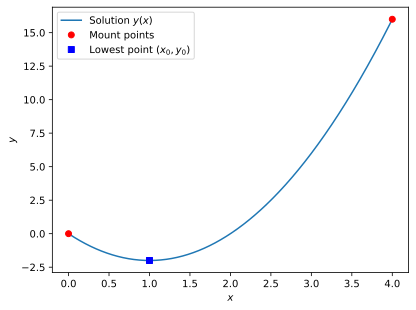

In [144]:
# Import Matplotlib and setup notebook plotting environment
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

x = np.linspace(xA, xB, num=600)
y = y_func(x - x0, α, y0)

plt.plot(x, y, label=f'Solution $y(x)$')
plt.plot([xA, xB], [yA, yB], 'ro', label='Mount points')
plt.plot([x0], [y0], 'bs', label='Lowest point $(x_0, y_0)$')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');